In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#leitura do arquivo de capituras
Data = pd.read_csv('Atividade.csv')

In [3]:
Data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.1,239.255.255.250,SSDP,458,NOTIFY * HTTP/1.1
1,2,0.000417,192.168.0.1,239.255.255.250,SSDP,467,NOTIFY * HTTP/1.1
2,3,0.000422,192.168.0.1,239.255.255.250,SSDP,530,NOTIFY * HTTP/1.1
3,4,0.000513,192.168.0.1,239.255.255.250,SSDP,522,NOTIFY * HTTP/1.1
4,5,0.000966,192.168.0.1,239.255.255.250,SSDP,467,NOTIFY * HTTP/1.1
...,...,...,...,...,...,...,...
207218,207219,5651.399521,192.168.0.11,208.80.52.15,TCP,66,51522 > 443 [ACK] Seq=726 Ack=41376288 Win=2...
207219,207220,5651.494647,208.80.52.15,192.168.0.11,TLSv1.2,102,Application Data
207220,207221,5651.494682,192.168.0.11,208.80.52.15,TCP,66,51522 > 443 [ACK] Seq=726 Ack=41376324 Win=2...
207221,207222,5651.494729,208.80.52.15,192.168.0.11,TLSv1.2,377,Application Data


In [4]:
#criando um data frame, com o material da capitura.
df = pd.DataFrame(Data)

In [5]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.1,239.255.255.250,SSDP,458,NOTIFY * HTTP/1.1
1,2,0.000417,192.168.0.1,239.255.255.250,SSDP,467,NOTIFY * HTTP/1.1
2,3,0.000422,192.168.0.1,239.255.255.250,SSDP,530,NOTIFY * HTTP/1.1
3,4,0.000513,192.168.0.1,239.255.255.250,SSDP,522,NOTIFY * HTTP/1.1
4,5,0.000966,192.168.0.1,239.255.255.250,SSDP,467,NOTIFY * HTTP/1.1
...,...,...,...,...,...,...,...
207218,207219,5651.399521,192.168.0.11,208.80.52.15,TCP,66,51522 > 443 [ACK] Seq=726 Ack=41376288 Win=2...
207219,207220,5651.494647,208.80.52.15,192.168.0.11,TLSv1.2,102,Application Data
207220,207221,5651.494682,192.168.0.11,208.80.52.15,TCP,66,51522 > 443 [ACK] Seq=726 Ack=41376324 Win=2...
207221,207222,5651.494729,208.80.52.15,192.168.0.11,TLSv1.2,377,Application Data


In [6]:
#todos os destinos e # antes tava info
Destino = Data['Destination'].value_counts()
Fonte = Data['Source'].value_counts()

In [7]:
#for i in info.keys():
#    print(info[i])

In [8]:
#criando um novo dicionario, onde vamos aglomerar todos os ips de destino, sua ocorrencia, carta e tempo .
dict_destination = {'IP' :Destino.index, 'Ocorrencia' : Destino.values, 'Carga' : [],  'Tempo' : []}
dict_fonte       = {'IP' :Fonte.index,   'Ocorrencia' : Fonte.values,   'Carga' : [],  'Tempo' : []}

In [9]:
dict_destination['Tempo'] = []
dict_fonte['Tempo'] =[]
dict_destination['Carga'] = []
dict_fonte['Tempo'] = []

for ip in Destino.index:
    services = Data.loc[Data['Destination'] == ip ]
    dict_destination['Carga'].append(services['Length'].sum())
    dict_destination['Tempo'].append(services['Time'].values[-1])

In [10]:
for ip in Fonte.index:
    services = Data.loc[Data['Source'] == ip]
    dict_fonte['Carga'].append(services['Length'].sum())
    dict_fonte['Tempo'].append(services['Time'].values[-1])

In [11]:
Dados_Filtrados_Destino = pd.DataFrame(dict_destination)

In [55]:
Dados_filtrados_Fonte = pd.DataFrame(dict_fonte)
Dados_filtrados_Fonte

,IP,Ocorrencia,Carga,Tempo
0,208.80.52.15,111725,48750788,5651.494729
1,192.168.0.11,65398,4411193,5651.494737
2,2804:29b8:5079:27a:a00:27ff:fe06:3993,7048,1352127,5638.268273
3,Tp-LinkT_3b:73:80,6414,500706,5650.997950
4,2804:29b8:1001:d::e,2113,34226857,1534.608096
...,...,...,...,...
93,a4:50:46:5f:32:b9,6,360,2371.773890
94,142.250.79.227,4,296,73.119309
95,0.0.0.0,4,1336,2371.125438
96,142.250.78.227,2,148,62.071809


In [63]:
#dict_destination['Carga']
for chave in dict_fonte['Carga']:
    print(chave)

48750788
4411193
1352127
500706
34226857
240899
2944427
285044
523878
108028
90125
19866
2247703
614455
529968
945604
234945
745868
73498
1307704
213462
256379
49991
1047664
44696
760718
625231
155579
258863
103194
145895
76979
5700
65950
157784
31049
236985
27259
88544
50566
51613
112983
12046
4416
23748
35714
20596
4796
8042
45677
7912
26885
3744
4187
9762
7516
6757
9912
19792
2020
16157
11612
7775
11248
7324
7323
22475
7090
9791
10294
7523
9721
5838
7189
6911
5316
8166
5845
4817
9201
8359
5582
2003
4685
5440
4521
4475
988
7751
6504
5547
5566
8469
360
296
1336
148
74


In [14]:
pd.Series(df['Length']).mean()

507.8008184419683

In [15]:
Dados_Filtrados_Destino

,IP,Ocorrencia,Carga,Tempo
0,192.168.0.11,113345,50188318,5651.494729
1,208.80.52.15,63700,4204981,5651.494737
2,2804:29b8:5079:27a:a00:27ff:fe06:3993,8317,47462076,5638.268221
3,Broadcast,3340,200382,5650.928651
4,IEEE-1905.1-Control,2921,291126,5650.997950
...,...,...,...,...
102,142.250.78.227,4,256,62.071868
103,ff02::1:ff5f:32b9,4,312,3519.214450
104,255.255.255.255,4,1336,2371.125438
105,ff02::fb,3,306,494.434622


In [16]:
Protocol = Data['Protocol'].value_counts()
Protocol

TLSv1.2     119532
TCP          73323
ARP           3968
ieee1905      2921
SSDP          2589
DHCPv6        1772
ICMPv6        1473
DNS           1098
IGMPv3         218
UDP            140
LLDP            95
OCSP            66
HTTP            12
MDNS             8
DHCP             4
LLC              4
Name: Protocol, dtype: int64

In [17]:
Dados_filtrados_Fonte

,IP,Ocorrencia,Carga,Tempo
0,208.80.52.15,111725,48750788,5651.494729
1,192.168.0.11,65398,4411193,5651.494737
2,2804:29b8:5079:27a:a00:27ff:fe06:3993,7048,1352127,5638.268273
3,Tp-LinkT_3b:73:80,6414,500706,5650.997950
4,2804:29b8:1001:d::e,2113,34226857,1534.608096
...,...,...,...,...
93,a4:50:46:5f:32:b9,6,360,2371.773890
94,142.250.79.227,4,296,73.119309
95,0.0.0.0,4,1336,2371.125438
96,142.250.78.227,2,148,62.071809


In [18]:
df['Length'][10]

458

In [19]:
DNS = []
cont =0
for i in df['Protocol']:
    cont+=1
    if 'DNS' in i:
        DNS.append(df['Length'][cont])
DNS

[84,
 60,
 207,
 94,
 86,
 167,
 167,
 86,
 86,
 167,
 167,
 86,
 86,
 167,
 167,
 60,
 87,
 196,
 162,
 74,
 77,
 66,
 174,
 110,
 86,
 102,
 102,
 167,
 167,
 86,
 86,
 167,
 183,
 166,
 74,
 86,
 86,
 84,
 84,
 374,
 167,
 60,
 207,
 66,
 74,
 75,
 75,
 75,
 75,
 102,
 90,
 130,
 269,
 221,
 73,
 73,
 74,
 74,
 118,
 76,
 76,
 323,
 154,
 142,
 180,
 75,
 75,
 204,
 80,
 80,
 371,
 73,
 73,
 137,
 157,
 77,
 77,
 144,
 179,
 155,
 170,
 94,
 77,
 75,
 75,
 94,
 74,
 94,
 141,
 94,
 103,
 94,
 102,
 94,
 86,
 94,
 73,
 4343,
 86,
 94,
 75,
 75,
 75,
 79,
 79,
 94,
 119,
 131,
 79,
 79,
 94,
 85,
 85,
 112,
 124,
 86,
 116,
 4311,
 130,
 519,
 90,
 296,
 352,
 74,
 84,
 207,
 195,
 94,
 86,
 167,
 167,
 86,
 86,
 87,
 87,
 167,
 162,
 167,
 86,
 86,
 196,
 74,
 60,
 74,
 77,
 125,
 174,
 74,
 102,
 600,
 183,
 74,
 86,
 74,
 66,
 86,
 86,
 66,
 66,
 86,
 86,
 167,
 167,
 86,
 86,
 167,
 167,
 60,
 86,
 74,
 74,
 75,
 75,
 167,
 167,
 86,
 86,
 90,
 102,
 75,
 75,
 130,
 118,
 73,
 73,

In [20]:
#esquerda requisição direita resposta.
Portas = []
#I neste ponto é o conteudo de informação.
for i in df['Info']:
    if '>' in i:
        Lista_info = i.split()
        Portas.append([Lista_info[0],Lista_info[2]])
        
Portas_Ocorrencias = pd.DataFrame(Portas)

Contagem_requisicao = Portas_Ocorrencias[0].value_counts()
Contegem_resposta = Portas_Ocorrencias[1].value_counts()


#for chave in Contagem_requisicao.keys():
#    print(chave)

In [21]:
#Data extraindo, todos os dados de informação
df2 = pd.DataFrame(Data['Info'])

In [22]:
#pegandos os aplicativos utilizados.
Sites = []
Sites_consumo = []
for linha in df['Info']:
    Lista_info = linha.split()
    if Lista_info[0] == 'Standard' and len(Lista_info) == 5:
        Sites.append(Lista_info[4])

df_Sites = pd.DataFrame(Sites)
Contagem_Sites = df_Sites[0].value_counts()
Contagem_Sites

for chave in Contagem_Sites.keys():
    print(Contagem_Sites[chave] )

78
78
42
34
14
14
12
12
12
12
10
10
10
9
8
8
8
7
6
6
6
6
6
6
6
6
6
5
4
4
4
4
4
4
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [23]:
df.describe()

,No.,Time,Length
count,207223.000000,207223.000000,207223.000000
mean,103612.000000,2601.553246,507.800818
std,59820.271754,1707.342467,2517.297852
min,1.000000,0.000000,42.000000
25%,51806.500000,1078.848700,66.000000
50%,103612.000000,2483.150904,102.000000
75%,155417.500000,4107.304953,359.000000
max,207223.000000,5651.494737,64346.000000


In [24]:
Dados_Filtrados_Destino.describe()

,Ocorrencia,Carga,Tempo
count,107.000000,1.070000e+02,107.000000
mean,1936.663551,9.834393e+05,1702.088824
std,12517.275262,6.649582e+06,2171.454044
min,2.000000,1.280000e+02,24.091977
25%,20.500000,2.572000e+03,238.107900
50%,36.000000,5.578000e+03,530.517831
75%,142.000000,1.834250e+04,2891.429844
max,113345.000000,5.018832e+07,5651.494737


In [25]:
Dados_filtrados_Fonte.describe()

,Ocorrencia,Carga,Tempo
count,98.000000,9.800000e+01,98.000000
mean,2114.520408,1.073755e+06,1386.037220
std,13014.896211,5.987215e+06,1939.363579
min,1.000000,7.400000e+01,24.091969
25%,18.000000,6.567250e+03,233.327229
50%,34.000000,1.410150e+04,508.840326
75%,135.000000,1.531580e+05,950.437783
max,111725.000000,4.875079e+07,5651.494737


In [26]:
tempo = df['Length'].sum()/5651.494729
bits = df['Length']/tempo
bits_d = pd.DataFrame(bits)

In [27]:
DNS_df = pd.DataFrame(DNS)
DNS_df[0].value_counts()

86       162
75        68
94        63
74        61
167       59
        ... 
419        1
164        1
247        1
400        1
57206      1
Name: 0, Length: 181, dtype: int64

Text(0, 0.5, 'Frequencia')

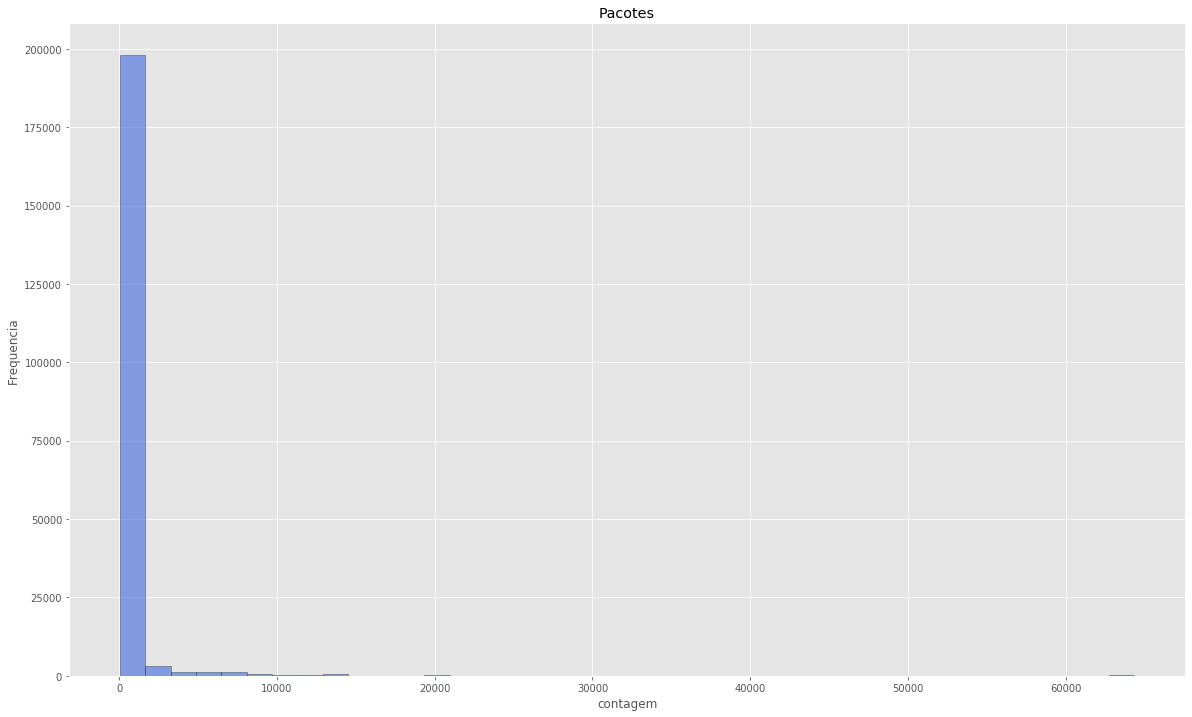

In [28]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["Length"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Pacotes")
plt.xlabel("contagem")
plt.ylabel("Frequencia")

Text(0, 0.5, 'Tempo de acesso')

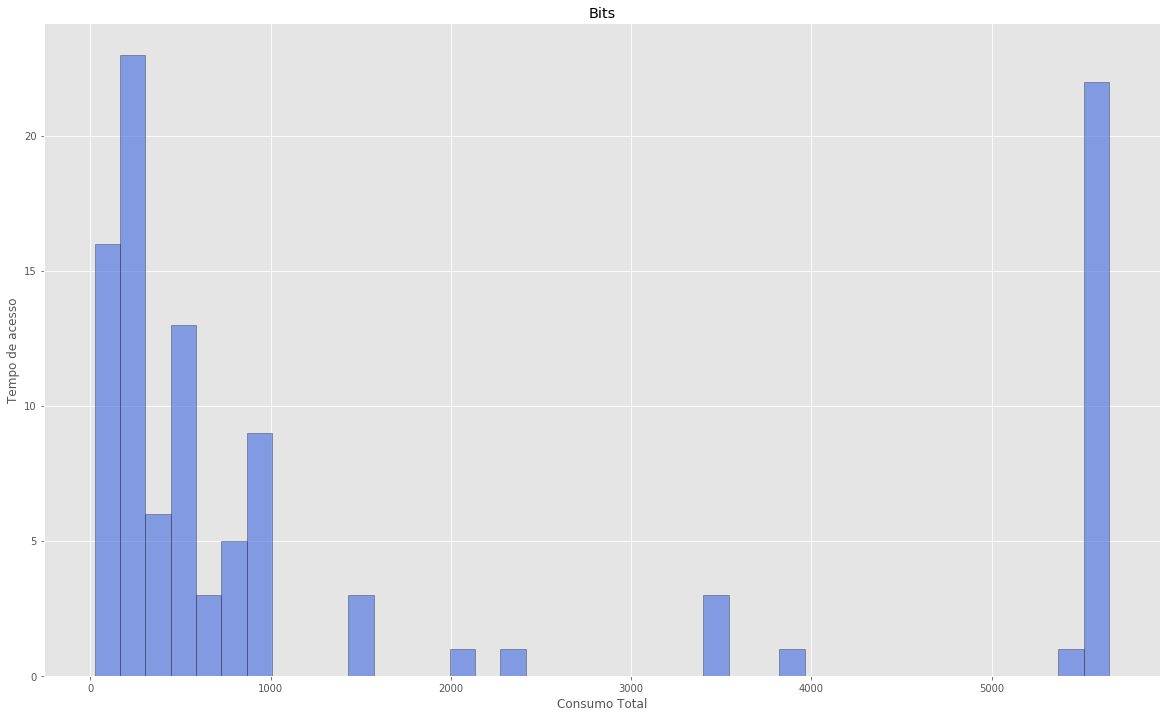

In [29]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
Dados_Filtrados_Destino['Tempo'].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Bits")
plt.xlabel("Consumo Total")
plt.ylabel("Tempo de acesso")

In [30]:
df['Length'].max()
f0 = Dados_Filtrados_Destino['Tempo'].value_counts()
f0 = pd.DataFrame(f0)
f0.index

Float64Index([ 654.2413349999999,        3519.517525,         792.624827,
               5636.226231000001,  5643.073667000001, 136.22823200000002,
                      508.313324, 2041.1071170000002,  5515.205822999999,
                      285.125565,
              ...
              1488.3842619999998, 252.09787200000002,         149.538718,
                     5530.206927,         233.088788,          68.293223,
                       335.12864,        5601.846553,  534.6526259999999,
                     5649.576358],
             dtype='float64', length=107)

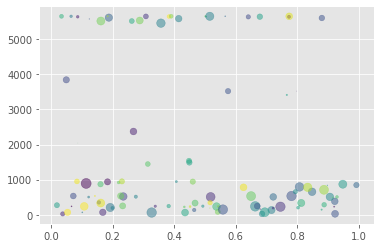

In [31]:
N = len(f0['Tempo'])
x = np.random.rand(N)


y = (f0.index)
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [32]:
freq = df['Length'].value_counts()
grupos = [] 
total = df['Length'].sum()
minu = df['Length'].min()
maxu = df['Length'].max()
media =round(df['Length'].mean(), 2)
mediana = df['Length'].median()
q1 = mediana/2
q3 = mediana*3/2
print('O total de bits' ,total)
print('A minima de ', minu)
print('O Maior troca é', maxu)
print(' A media é ', media)
print('A medianda  é', mediana)
print(' O', q1)
print(q3)

O total de bits 105228009
A minima de  42
O Maior troca é 64346
 A media é  507.8
A medianda  é 102.0
 O 51.0
153.0


In [33]:
df['Length'].std()

2517.2978524345467

In [34]:
df['Length'].var()

6336788.477871582

In [35]:
bins = [0, minu, q1, mediana, q3, media, maxu]
df2=df.groupby(pd.cut(df['Length'], bins=bins )).size().reset_index(name='count')
print (df2)

             Length   count
0       (0.0, 42.0]     473
1      (42.0, 51.0]       0
2     (51.0, 102.0]  133683
3    (102.0, 153.0]    4430
4    (153.0, 507.8]   57328
5  (507.8, 64346.0]   11309


In [36]:
dados = [ ]
for freq in range(len(df2['count'])):
    for i in range(0,df2['count'][freq]):
        dados.append(bins[freq+1])

In [37]:
bits_s = (df['Length'].sum())/5651
bits_s

18621.13059635463

In [38]:
Ndf = Data
F_Ndf = Ndf.loc[df['Source'] == '208.80.52.15']
F_Ndf['Length'].value_counts()

102      53449
364       1612
367       1595
366       1568
365       1563
         ...  
1509         1
9761         1
1573         1
10017        1
2113         1
Name: Length, Length: 2839, dtype: int64

(array([1.07428e+05, 1.35800e+03, 9.64000e+02, 1.09700e+03, 8.58000e+02,
        1.40000e+01, 3.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   66. ,  1948.4,  3830.8,  5713.2,  7595.6,  9478. , 11360.4,
        13242.8, 15125.2, 17007.6, 18890. ]),
 <a list of 10 Patch objects>)

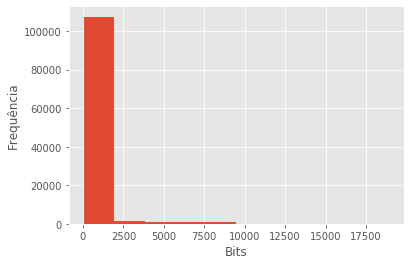

In [39]:
plt.xlabel('Bits')
plt.ylabel('Frequência')
plt.hist(F_Ndf['Length'])

In [40]:
drop_df = F_Ndf

F_Ndf['Length'].value_counts()

102      53449
364       1612
367       1595
366       1568
365       1563
         ...  
1509         1
9761         1
1573         1
10017        1
2113         1
Name: Length, Length: 2839, dtype: int64

In [41]:
#102 x 53449 TCP
drop_df2 = drop_df[drop_df['Length'] != 66]
drop_df3 = drop_df2[drop_df['Length'] != 74]
drop_df4 = drop_df3[drop_df['Length'] != 102]

C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## 

In [42]:
drop_df5 = drop_df4[drop_df['Length'] != 102] 
drop_df6 = drop_df5[drop_df['Length'] != 4657]
drop_df7 = drop_df6[drop_df['Length'] != 2642 ]
drop_df8 = drop_df7[drop_df['Length'] != 4785]
drop_df9 = drop_df8[drop_df['Length'] != 723]
drop_df10 = drop_df9[drop_df['Length'] != 4130]

C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\werla\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key

In [43]:
drop_df10['Length'].value_counts()

numeros = []
for i in drop_df10['Length'].value_counts():
    if i > 9:
        numeros.append(i)
numeros        

[1612,
 1595,
 1568,
 1563,
 1532,
 1499,
 1490,
 1465,
 1453,
 1428,
 1342,
 1336,
 1315,
 1305,
 1302,
 1142,
 1125,
 1114,
 1067,
 1024,
 960,
 900,
 897,
 870,
 841,
 747,
 737,
 671,
 666,
 590,
 578,
 549,
 548,
 482,
 475,
 474,
 426,
 424,
 418,
 403,
 386,
 361,
 337,
 330,
 316,
 308,
 307,
 281,
 273,
 266,
 266,
 257,
 255,
 242,
 238,
 232,
 232,
 219,
 217,
 211,
 205,
 203,
 199,
 195,
 187,
 180,
 178,
 177,
 169,
 168,
 167,
 162,
 162,
 161,
 160,
 159,
 152,
 151,
 145,
 142,
 140,
 138,
 138,
 135,
 135,
 131,
 131,
 122,
 122,
 121,
 120,
 120,
 120,
 117,
 115,
 115,
 111,
 111,
 110,
 110,
 106,
 106,
 105,
 104,
 103,
 103,
 99,
 98,
 98,
 97,
 97,
 96,
 94,
 88,
 85,
 79,
 78,
 73,
 68,
 66,
 66,
 65,
 62,
 61,
 53,
 47,
 45,
 43,
 42,
 36,
 35,
 34,
 32,
 31,
 31,
 26,
 23,
 23,
 20,
 19,
 17,
 17,
 17,
 16,
 15,
 12,
 12,
 11,
 11,
 10,
 10,
 10]

In [44]:
vamos_v = pd.DataFrame(numeros)

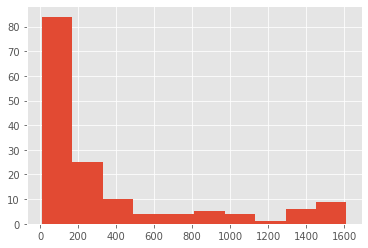

In [45]:
vamos_v[0].hist()

In [46]:
vamos_v

,0
0,1612
1,1595
2,1568
3,1563
4,1532
...,...
147,11
148,11
149,10
150,10


In [47]:
Ndf4 = Data
F_Ndf2 = Ndf4.loc[df['Source'] == '192.168.0.9']
F_Ndf2['Length'].value_counts()

171    565
166    565
211    176
60     121
698     70
62       7
179      3
82       3
83       2
Name: Length, dtype: int64

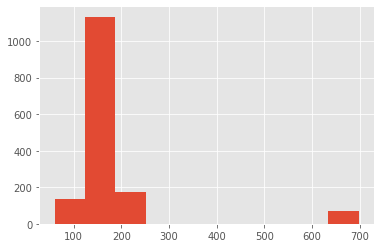

In [48]:
F_Ndf2['Length'].hist(bins =10)

In [49]:
Ndf4 = Data
F_Ndf2 = Ndf4.loc[df['Source'] == '192.168.0.11']
F_Ndf2['Length'].value_counts()

66      64531
75        112
74         93
86         82
97         72
        ...  
492         1
1496        1
474         1
395         1
895         1
Name: Length, Length: 109, dtype: int64

In [50]:
f0 = df['Length'].value_counts()
f0 = pd.DataFrame(f0)
f0.index


Int64Index([  66,  102,   86,   60,  101,  364,  367,  365,  366,  363,
            ...
            5573,  967, 5445, 5317, 9411, 1095, 3142, 5189, 7236, 2049],
           dtype='int64', length=3633)

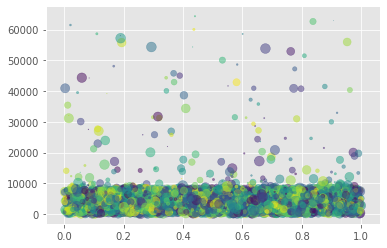

In [51]:
# Fixing random state for reproducibility

N = len(f0['Length'])
x = np.random.rand(N)








y = (f0.index)
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [52]:
freq = F_Ndf2['Length'].value_counts()
grupos = [] 

minu = F_Ndf2['Length'].min()
maxu = F_Ndf2['Length'].max()
media = F_Ndf2['Length'].mean()
mediana = F_Ndf2['Length'].median()
q1 = mediana/2
q3 = mediana*3/2

print(minu)
print(maxu)
print(media)
print(mediana)
print(q1)
print(q3)

tempo = F_Ndf2['Length'].sum()/5651.494729

print(tempo)
x = ['minima', 'maxima' , 'media', 'mediana' , 'q1', 'q3']
y = [minu , maxu, media, mediana, q1, q3]

54
2962
67.45149698767547
66.0
33.0
99.0
780.5356302226501


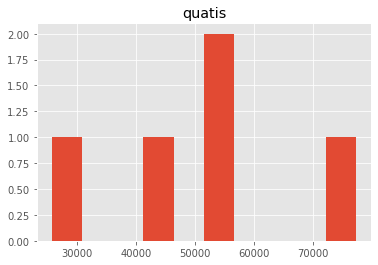

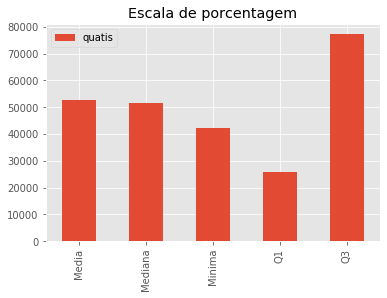

In [53]:
dft = pd.DataFrame({'quatis': {'Minima': minu*tempo,'Q1' :q1*tempo, 'Mediana': mediana*tempo , 'Media': media*tempo,'Q3' : q3*tempo }})

dft.hist()

dft.plot.bar(stacked=True, title='Escala de porcentagem')

In [54]:
x = [np.gauss(3,1) for _ in range(400)]

AttributeError: module 'numpy' has no attribute 'gauss'

In [ ]:
x